In [1]:
import numpy as np
import pandas as pd
import cv2
#import dlib
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization, Flatten, MaxPool2D
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.layers import Conv2D, Reshape
from tensorflow.keras.optimizers import Adam
from tqdm.notebook import tqdm_notebook as tqdm
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications import VGG16
import warnings
warnings.filterwarnings('ignore')

import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from PIL import Image, ImageTk


In [2]:
from tensorflow.keras.models import Model

In [3]:
from keras.utils import Sequence
from tensorflow.keras.backend import epsilon
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau,Callback
import os


In [4]:
print(os.listdir("C:\\Users\\user08\\Desktop\\PROJECTS\\DEEP DETECTION\\real_and_fake_face\\"))


['real_and_fake_face_model.h5', 'training_fake', 'training_real']


In [5]:
training_fake = "C:\\Users\\user08\\Desktop\\PROJECTS\\DEEP DETECTION\\real_and_fake_face\\training_fake\\"
training_real = "C:\\Users\\user08\\Desktop\\PROJECTS\\DEEP DETECTION\\real_and_fake_face\\training_real\\"

fake_path = os.listdir(training_fake)
real_path = os.listdir(training_real)

In [6]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image,(224, 224))
    return image[...,::-1]




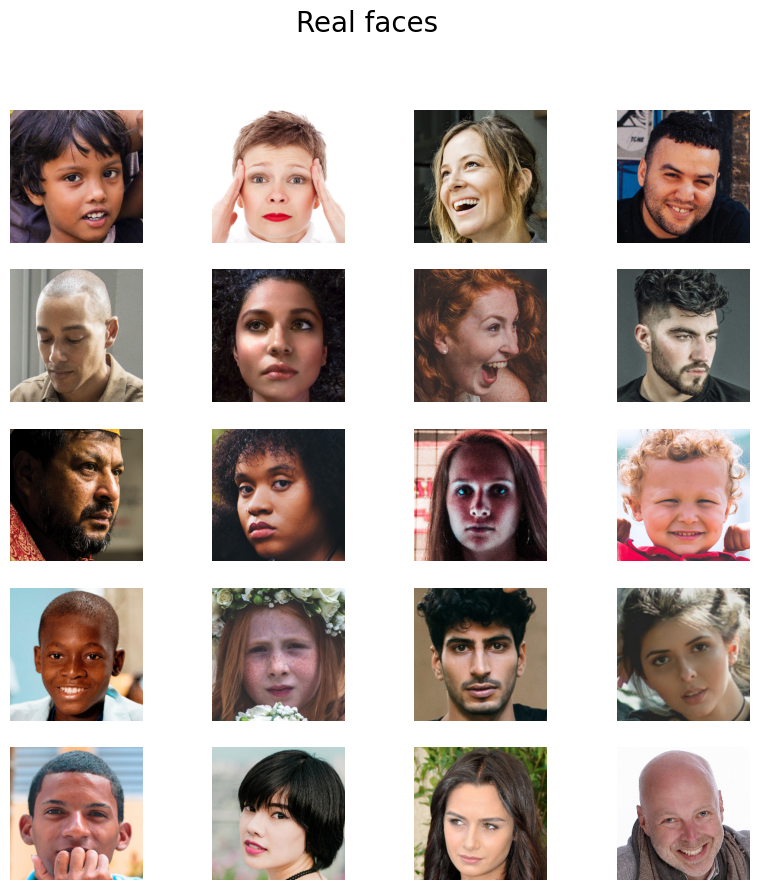

In [7]:
fig = plt.figure(figsize=(10, 10))
#10x10px m image plot hogi for visual purposes
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(load_img(training_real + real_path[i]), cmap='gray')
    plt.suptitle("Real faces",fontsize=20)
    plt.axis('off')
plt.show()

In [8]:
dataset_path = "C:\\Users\\user08\\Desktop\\PROJECTS\\DEEP DETECTION\\real_and_fake_face\\"

In [9]:
data_with_aug = ImageDataGenerator(horizontal_flip=True,vertical_flip=False,rescale=1./255,validation_split=0.2)

In [10]:
train = data_with_aug.flow_from_directory(dataset_path,class_mode="binary",target_size=(96, 96),batch_size=32,subset="training")

Found 1633 images belonging to 2 classes.


In [11]:
train = data_with_aug.flow_from_directory(dataset_path,class_mode="binary",target_size=(96, 96),batch_size=32,subset="training")

Found 1633 images belonging to 2 classes.


In [12]:
val = data_with_aug.flow_from_directory(dataset_path, class_mode="binary",target_size=(96, 96),batch_size=32,subset="validation")

Found 408 images belonging to 2 classes.


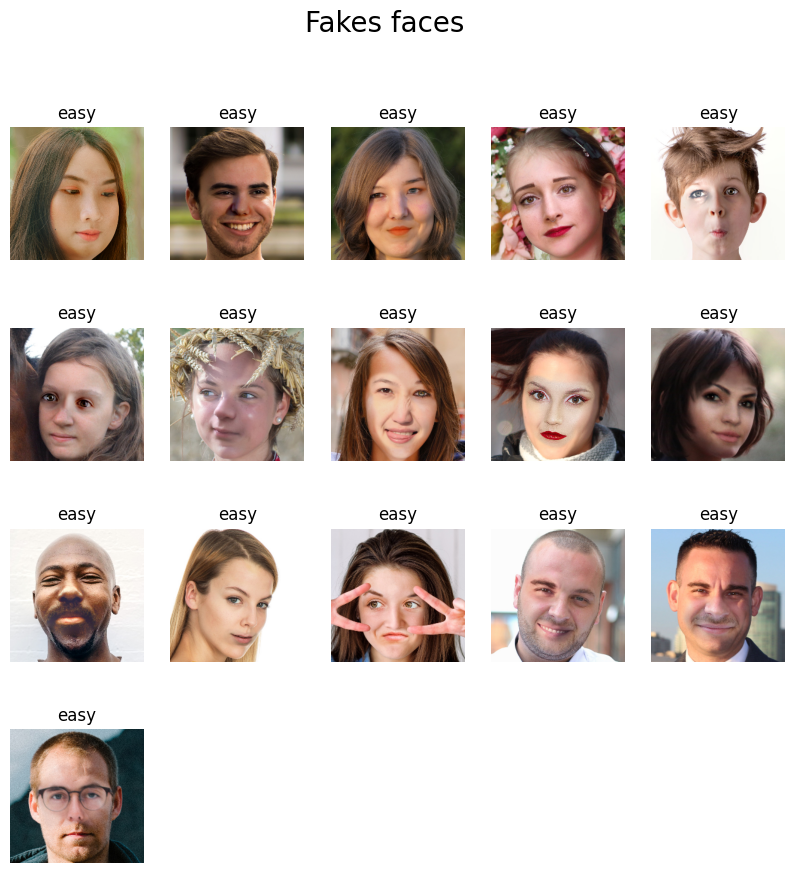

In [13]:
fig = plt.figure(figsize=(10,10))

for i in range(16):
    plt.subplot(4, 5, i+1)
    plt.imshow(load_img(training_fake + fake_path[i]), cmap='gray')
    plt.suptitle("Fakes faces",fontsize=20)
    plt.title(fake_path[i][:4])
    plt.axis('off')

plt.show()

In [14]:
data_with_aug = ImageDataGenerator(horizontal_flip=True,
                                   #Row col interchange
                                   vertical_flip=False,
                                   rescale=1./255, 
#rescaling kyuki RGB ki values 0-255 hoti h which is very big for model so 0-1 ke beech m krne k liye 1/255
                                  validation_split=0.2)
#If you don't, your results will be biased, and you'll end up with a false impression of better model accuracy

In [15]:
train = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(96, 96),
                                          batch_size=32,
                                          subset="training")

Found 1633 images belonging to 2 classes.


In [16]:

#Augumented data ke batches banke value will be replaced by augumented data for model training
val = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(96, 96),
                                          batch_size=32,
                                          subset="validation"
                                          )

Found 408 images belonging to 2 classes.


In [18]:
# Prepare test data
test_data_gen = ImageDataGenerator(rescale=1./255)
test_path = "C:\\Users\\user08\\Desktop\\PROJECTS\\DEEP DETECTION\\real_and_fake_face\\"
test = test_data_gen.flow_from_directory(test_path,
                                         class_mode="binary",
                                         target_size=(96, 96),
                                         batch_size=32, 
                                         shuffle=False)

Found 2041 images belonging to 2 classes.


In [19]:
tf.keras.backend.clear_session()

model = Sequential([GlobalAveragePooling2D(),
                    Dense(512, activation = "relu"),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation = "relu"),
                    Dropout(0.1),
                    # Dense(32, activation = "relu"),
                    # Dropout(0.3),
                    Dense(2, activation = "softmax")])

model.layers[0].trainable = False



In [20]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
def scheduler(epoch):
    if epoch <= 2:
        return 0.001
    elif epoch > 2 and epoch <= 15:
        return 0.0001 
    else:
        return 0.00001

lr_callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [22]:
hist = model.fit(train,
                    epochs=20,
                    callbacks=[lr_callbacks],
                    validation_data=val)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 31s 439ms/step - accuracy: 0.5256 - loss: 0.7127 - val_accuracy: 0.5221 - val_loss: 0.6915 - learning_rate: 0.0010
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 349ms/step - accuracy: 0.5217 - loss: 0.7390 - val_accuracy: 0.5294 - val_loss: 0.6916 - learning_rate: 0.0010
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 360ms/step - accuracy: 0.5320 - loss: 0.7155 - val_accuracy: 0.5294 - val_loss: 0.6916 - learning_rate: 0.0010
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 360ms/step - accuracy: 0.5048 - loss: 0.7014 - val_accuracy: 0.5294 - val_loss: 0.6916 - learning_rate: 1.0000e-04
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 352ms/step - accuracy: 0.5360 - loss: 0.6908 - val_accuracy: 0.5294 - val_loss: 0.6915 - learning_rate: 1.0000e-04
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 356ms/step - accuracy: 0.5118 - loss: 0.6932 - val_accuracy: 0.5294 - val_loss: 0.6914 - learning_rate: 1.0000e-04
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 356ms/step - accuracy: 0.530

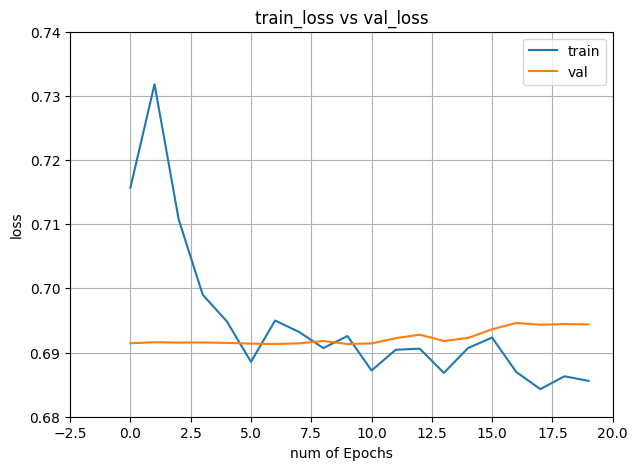

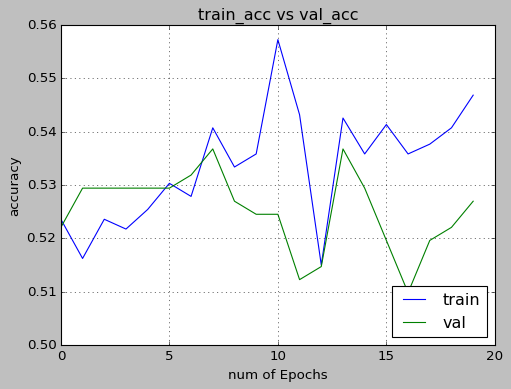

In [23]:

epochs = 20
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [24]:
train = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(224, 224),
                                          batch_size=98,
                                          subset="training")

val = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(224, 224),
                                          batch_size=98,
                                          subset="validation"
                                          )

Found 1633 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


In [25]:
vgg16_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights="imagenet", input_shape=(224,224,3))

In [26]:
vgg16_model.output[-1]

<KerasTensor shape=(7, 7, 512), dtype=float32, sparse=False, name=keras_tensor_27>

In [27]:

# Define the input tensor
input_tensor = Input(shape=(224, 224, 3))

# Load the VGG16 model without the top layers, specifying the input tensor
vgg16_model = VGG16(include_top=False, input_tensor=input_tensor)

# Add a Flatten layer
x = Flatten()(vgg16_model.output)

# Add a Dense layer
x = Dense(2, activation='softmax')(x)

# Define the model
model = Model(inputs=input_tensor, outputs=x)

# Freeze the VGG16 base model
for layer in vgg16_model.layers:
    layer.trainable = False

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Print the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

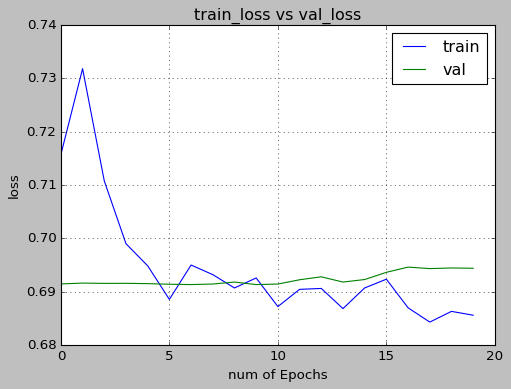

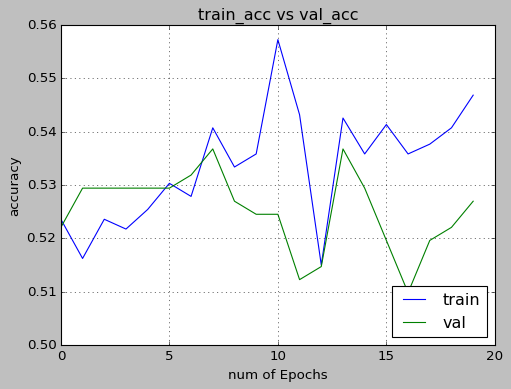

In [28]:
#visualisation of accuracy and loss
epochs = 20
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [29]:
#Predictions
#Creating an array of predicted test images

predictions = model.predict(val)

5/5 ━━━━━━━━━━━━━━━━━━━━ 131s 23s/step


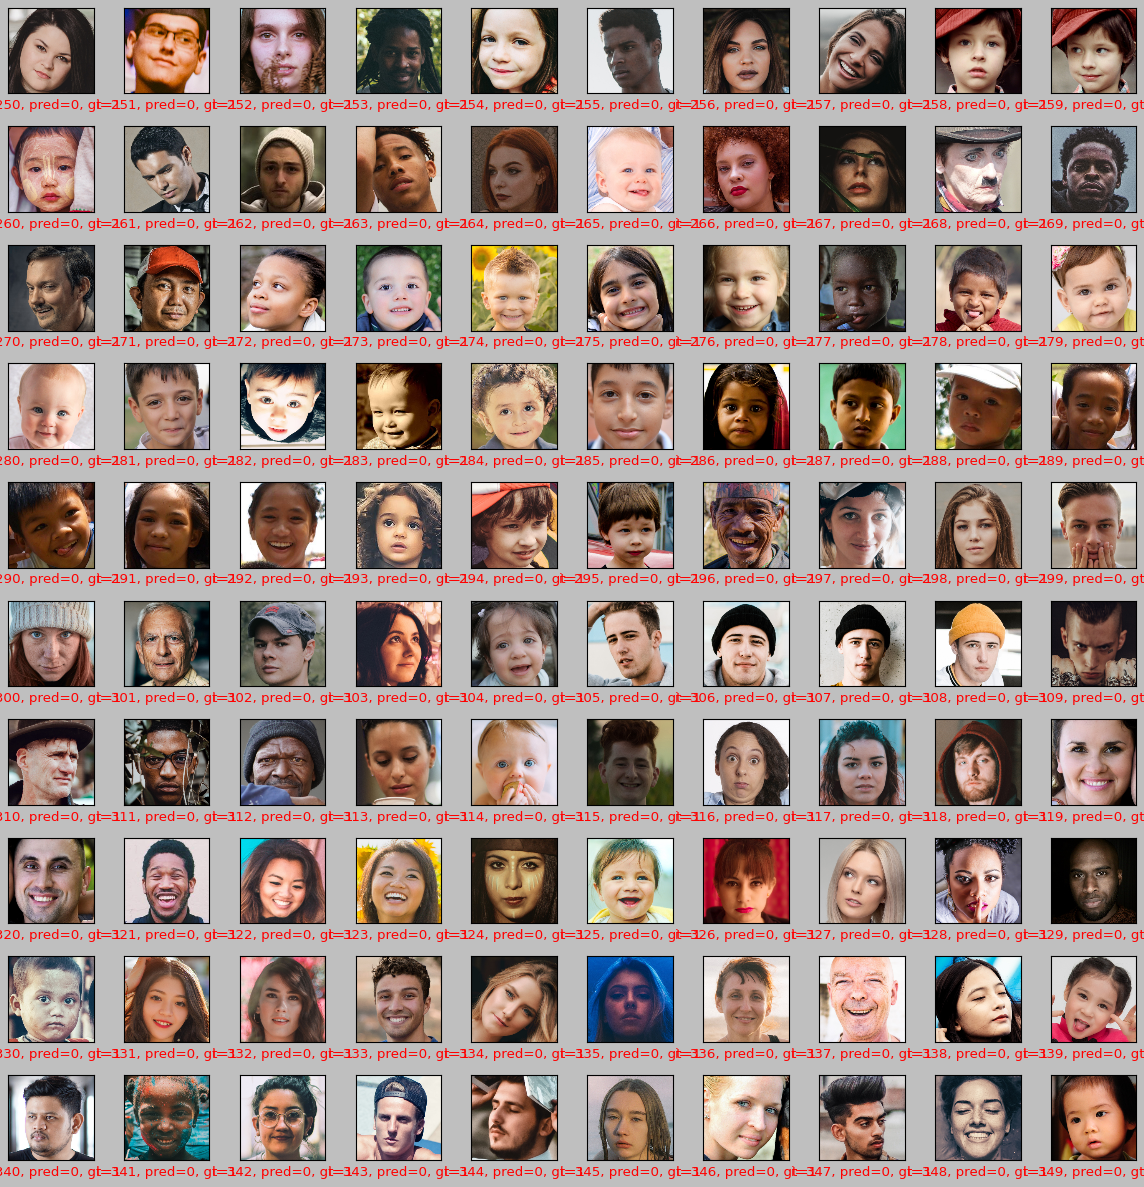

In [31]:

val_path = "C:\\Users\\user08\\Desktop\\PROJECTS\\DEEP DETECTION\\real_and_fake_face\\"
# Figure Initialization
plt.figure(figsize=(15,15))

start_index = 250

# Loop through 100 Images
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    # Get the predicted class for the current image
    preds = np.argmax(predictions[start_index + i])  # Make sure predictions shape is correct
    
    # Extract the ground truth label from filename
    filename = val.filenames[start_index + i]
    gt = filename[9:13]  # Ensure this matches the actual filename format

    if gt == "fake":
        gt = 0
    else:
        gt = 1
    
    # Check if the prediction matches the ground truth
    if preds != gt:
        col = "r"
    else:
        col = "g"

    plt.xlabel(f'i={start_index+i}, pred={preds}, gt={gt}', color=col)
    
    try:
        img = load_img(val_path + filename)
        plt.imshow(img)
    except Exception as e:
        print(f"Error loading image {filename}: {e}")
        plt.imshow(np.ones((256, 256, 3)))  # Display a white placeholder image in case of error
    
    plt.tight_layout()

plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 123s 23s/step - accuracy: 0.4755 - loss: 1.1595
Validation Loss: 1.162362813949585, Validation Accuracy: 0.47058823704719543
5/5 ━━━━━━━━━━━━━━━━━━━━ 137s 25s/step


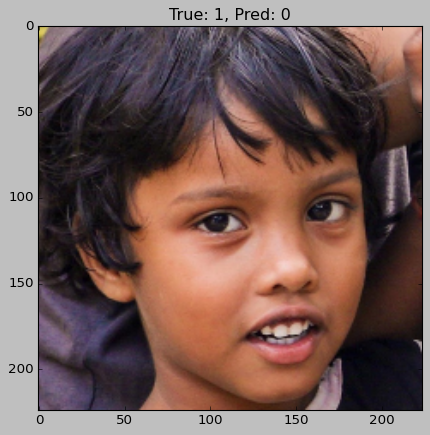

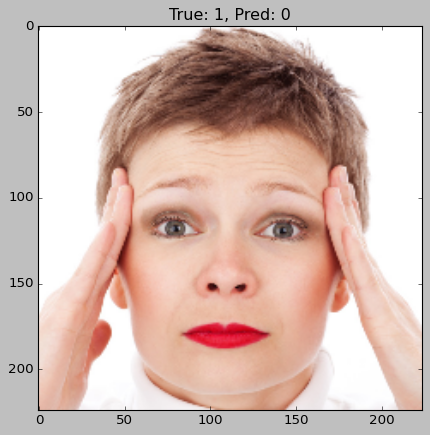

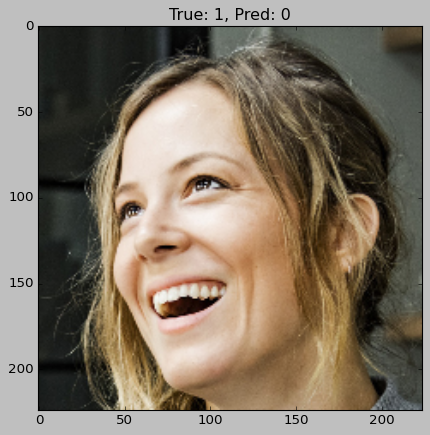

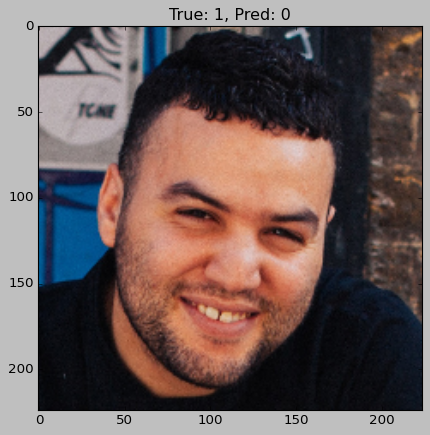

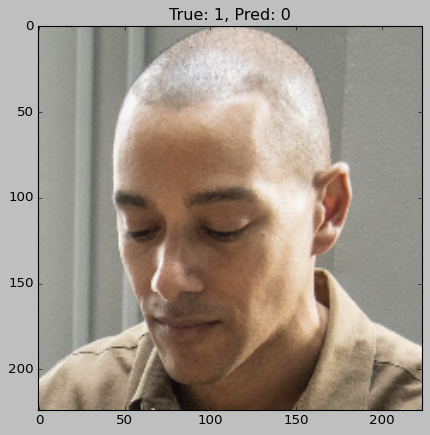

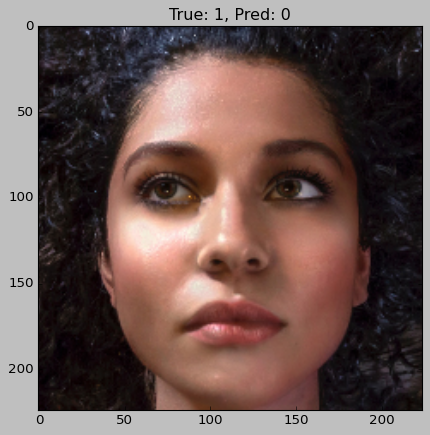

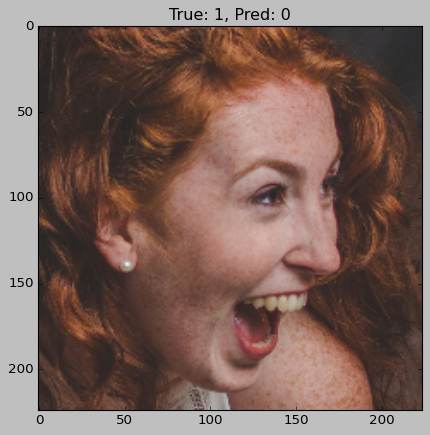

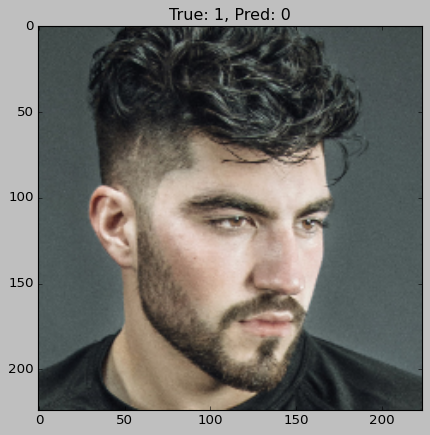

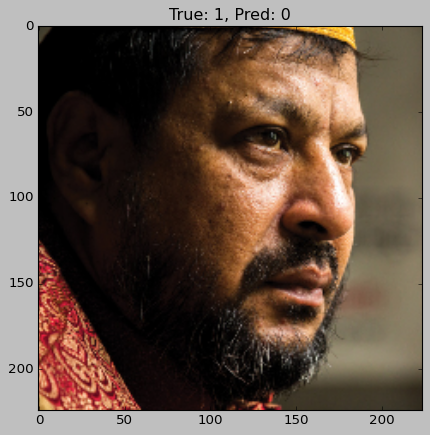

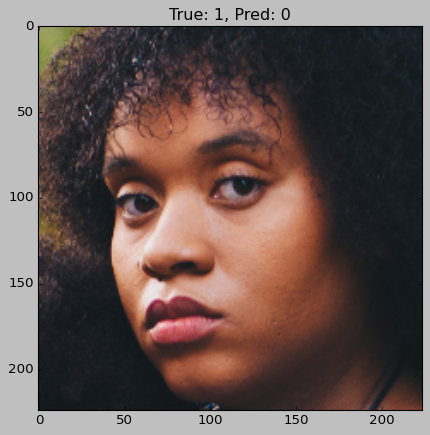

In [32]:
# Evaluate the model on the validation set
eval_result = model.evaluate(val)
print(f"Validation Loss: {eval_result[0]}, Validation Accuracy: {eval_result[1]}")

# Obtain predictions on the validation set
val_pred = model.predict(val)
val_pred = np.argmax(val_pred, axis=1)

# Get true labels
val_true = val.classes

# Identify misclassified indices
misclassified_indices = np.where(val_true != val_pred)[0]

# Display misclassified images
for i in misclassified_indices[:10]:
    img_path = os.path.join(dataset_path, val.filenames[i])
    img = load_img(img_path)
    plt.imshow(img)
    plt.title(f"True: {val_true[i]}, Pred: {val_pred[i]}")
    plt.show()

In [33]:
#save model
model.save("C:\\Users\\user08\\Desktop\\PROJECTS\\DEEP DETECTION\\real_and_fake_face\\real_and_fake_face_model.h5")


In [34]:
# Function to load the pre-trained model
def load_model():
    model_path = "C:\\Users\\user08\\Desktop\\PROJECTS\\DEEP DETECTION\\real_and_fake_face\\real_and_fake_face_model.h5"
    model = tf.keras.models.load_model(model_path)
    return model

# Initialize the model
model = load_model()

# Tkinter GUI Class
class App:
    def __init__(self, root):
        self.root = root
        self.root.title("Real and Fake Face Detection")
        self.root.geometry("800x600")
        
        self.label = tk.Label(root, text="Real and Fake Face Detection", font=("Helvetica", 16))
        self.label.pack(pady=20)
        
        self.canvas = tk.Canvas(root, width=400, height=400)
        self.canvas.pack()
        
        self.btn_load = tk.Button(root, text="Load Image", command=self.load_image)
        self.btn_load.pack(pady=10)
        
        self.btn_predict = tk.Button(root, text="Predict", command=self.predict)
        self.btn_predict.pack(pady=10)
        
        self.result_label = tk.Label(root, text="", font=("Helvetica", 14))
        self.result_label.pack(pady=20)
        
    def load_image(self):
        self.filepath = filedialog.askopenfilename()
        if self.filepath:
            self.img = Image.open(self.filepath)
            self.img.thumbnail((400, 400))
            self.img = ImageTk.PhotoImage(self.img)
            self.canvas.create_image(0, 0, anchor=tk.NW, image=self.img)
    
    def predict(self):
        if hasattr(self, 'filepath'):
            image = cv2.imread(self.filepath)
            image = cv2.resize(image, (224, 224))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = preprocess_input(image)
            image = np.expand_dims(image, axis=0)
            preds = model.predict(image)
            pred_class = np.argmax(preds, axis=1)
            
            if pred_class == 0:
                self.result_label.config(text="Prediction: Fake Face", fg="red")
            else:
                self.result_label.config(text="Prediction: Real Face", fg="green")
        else:
            messagebox.showerror("Error", "Please load an image first")

root = tk.Tk()
app = App(root)
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 996ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step
